## Visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [12]:
df=pd.read_csv("CleanedDataSet.csv")


In [14]:
# Convert date columns to datetime format
df['DOB'] = pd.to_datetime(df['DOB'], format='%d/%m/%y', errors='coerce')
df['Lead_Creation_Date'] = pd.to_datetime(df['Lead_Creation_Date'], format='%d/%m/%y', errors='coerce')

In [16]:
# Calculate Age from DOB
df['Age'] = df['DOB'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

In [18]:
df.isnull().sum()

ID                                     0
Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Code                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
EMI                                    0
Var1                                   0
Approved                               0
Age                                    0
dtype: int64

## Visualizations
####    1. Target Variable Distribution (Approved vs. Not Approved) - Count plot

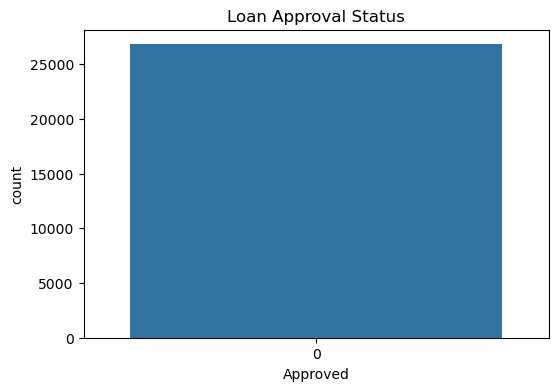

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Approved') # get Count for loan approval status

# Show the plot
plt.title('Loan Approval Status')
plt.show()

#### 2. Gender Distribution - Pie chart

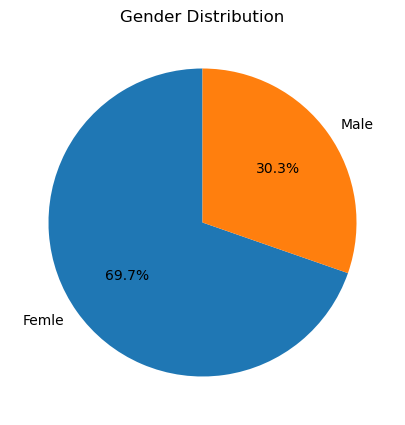

In [22]:
gender_count=df['Gender'].value_counts() # Number of Occurrences for each gender

# Mapping Labels
label=['Male' if Gender==1 else 'Femle' for Gender in gender_count.index]

plt.figure(figsize=(6,5))
plt.pie(gender_count,labels=label, autopct='%1.1f%%', startangle=90)

# Show the plot
plt.title('Gender Distribution')
plt.show()

#### 3.Monthly Income Distribution - Histogram

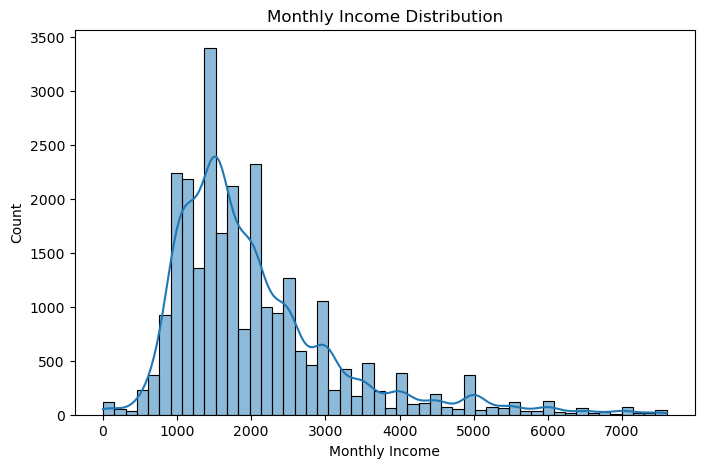

In [24]:
# Histogram for Monthly income
plt.figure(figsize=(8,5))
sns.histplot(df['Monthly_Income'],bins=50, kde=True) # Histogram and KDE curve

# Show the plot
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

#### 4. Monthly Income vs Loan Approval - Boxplot

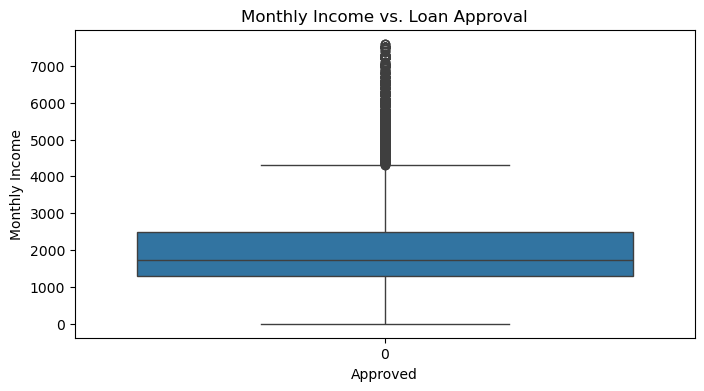

In [26]:
# Mapping Labels
label=['Approved' if Gender==1 else 'Not Approved' for Gender in gender_count.index]

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Approved', y='Monthly_Income') 

# Show the plot
plt.title('Monthly Income vs. Loan Approval')
plt.ylabel('Monthly Income')
plt.show()

#### 5. Loan Period Distribution - Bar Chart

<function matplotlib.pyplot.show(close=None, block=None)>

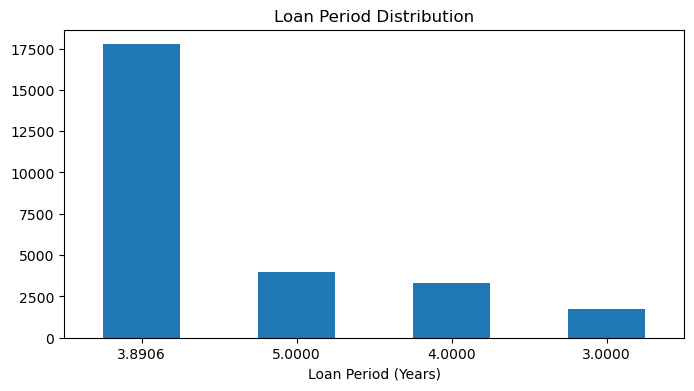

In [28]:
plt.figure(figsize=(8,4))

# Create Bar Chart for Loan Period
ax=df['Loan_Period'].value_counts().plot.bar()
plt.title('Loan Period Distribution')
plt.xlabel('Loan Period (Years)')

# Format x-axis labels to 4 decimal places
ax.set_xticklabels([f'{x:.4f}'for x in df['Loan_Period'].value_counts().index],rotation=0)

# Show the plot
plt.show

#### 6. Exisiting EMI vs Monthly Income - Scatter plot

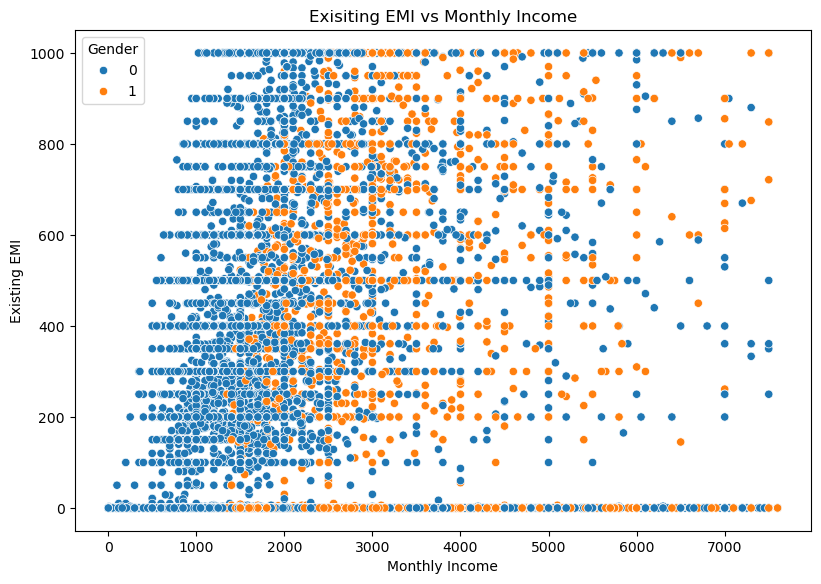

In [30]:
plt.figure(figsize=(9.5, 6.5))

# Label mapping
labels = ['Male' if gender == 1 else 'Female' for gender in gender_count.index]

# Scatter plot
sns.scatterplot(x='Monthly_Income', y='Existing_EMI', data=df, hue='Gender')

# Show the plot
plt.title('Exisiting EMI vs Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Existing EMI')
plt.show()

#### 7. Top 5 Source Categories - Pie chart

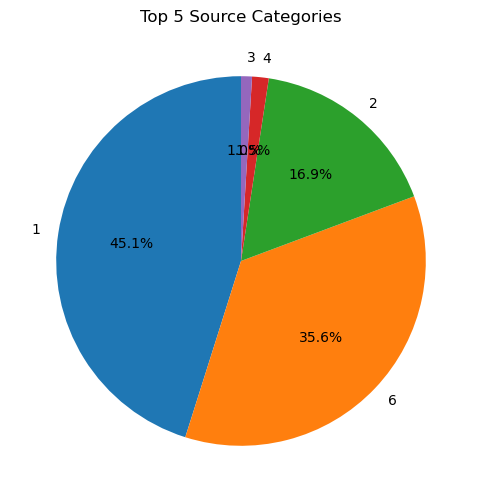

In [32]:
source_counts = df['Source_Category'].value_counts().head(5)  # Top 5 categories
plt.figure(figsize=(8, 6))

# Pie chart
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90)

# Show the plot
plt.title('Top 5 Source Categories')
plt.show()

#### 8. Monthly Income vs Loan Amount - Scatter plot

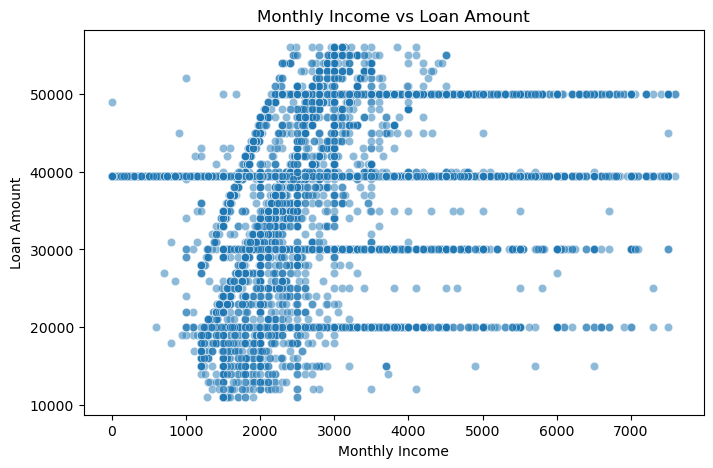

In [34]:
plt.figure(figsize=(8,5))

# Scatter plot with transparency
sns.scatterplot(x='Monthly_Income',y='Loan_Amount',data=df,alpha=0.5)

# Show the plot
plt.title('Monthly Income vs Loan Amount')
plt.xlabel('Monthly Income')
plt.ylabel('Loan Amount')
plt.show()

#### 9. Existing EMI by Loan Approval - Violin Plot

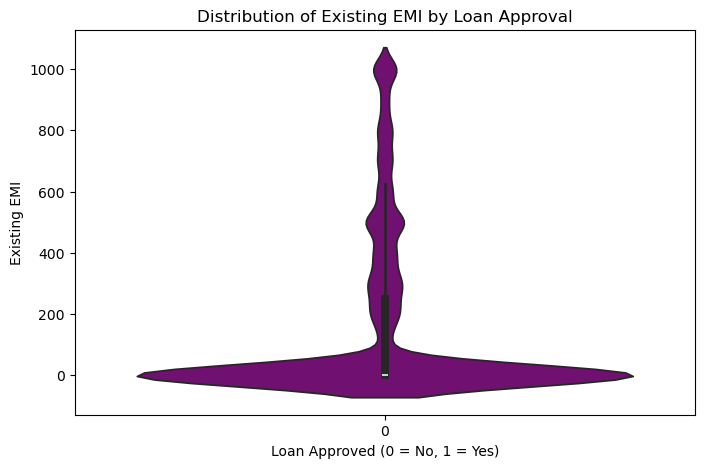

In [36]:
plt.figure(figsize=(8, 5))

# Create Violin plot
sns.violinplot(x=df['Approved'], y=df['Existing_EMI'],color="purple")

# Show the plot
plt.title('Distribution of Existing EMI by Loan Approval')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Existing EMI')
plt.show()

#### 10.Interest Rate Trends by Loan Period - Line Chart

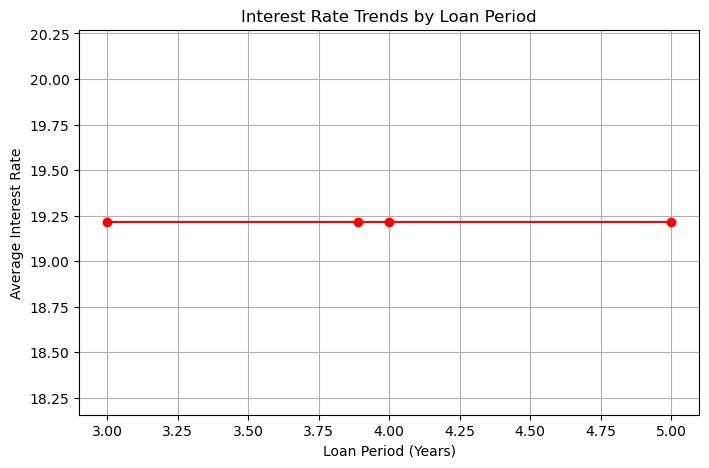

In [38]:
plt.figure(figsize=(8, 5)) 

# Line plot with markers
df.groupby('Loan_Period')['Interest_Rate'].mean().plot(marker="o", linestyle="-", color="red")  

# Show the plot
plt.title('Interest Rate Trends by Loan Period')  
plt.xlabel('Loan Period (Years)')  
plt.ylabel('Average Interest Rate') 
plt.grid(True)  # Add grid for better readability
plt.show()  

#### 11. Loan Amount vs. Loan Period - Scatter plot

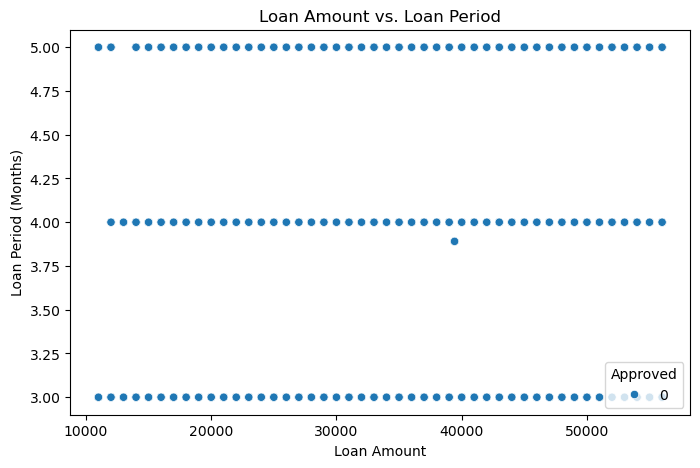

In [40]:
plt.figure(figsize=(8, 5))

# Scatter plot with hue
sns.scatterplot(x='Loan_Amount', y='Loan_Period', data=df, hue='Approved')

# Show the plot
plt.title('Loan Amount vs. Loan Period')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Period (Months)')
plt.show()

#### 12. City Category Distribution - Count plot

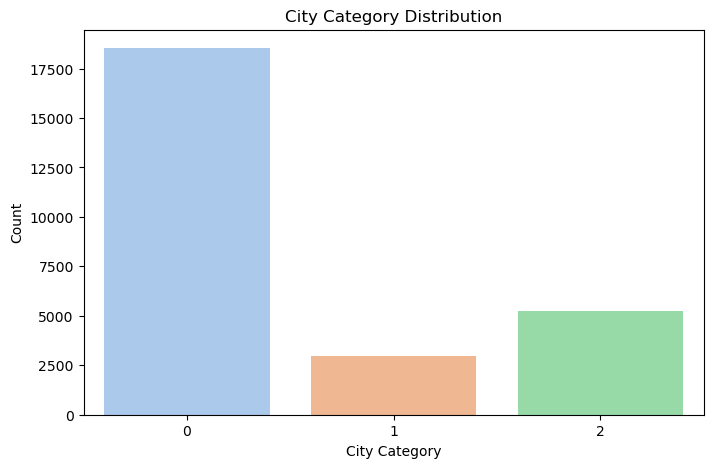

In [42]:
plt.figure(figsize=(8, 5))

# Fix: Assign 'City_Category' to hue and disable the legend
sns.countplot(x='City_Category', hue='City_Category', data=df, palette="pastel", legend=False)

# Show the plot
plt.title("City Category Distribution")
plt.xlabel("City Category")
plt.ylabel("Count")
plt.show()

#### 13.  Employer Category vs Monthly Income - Boxplot

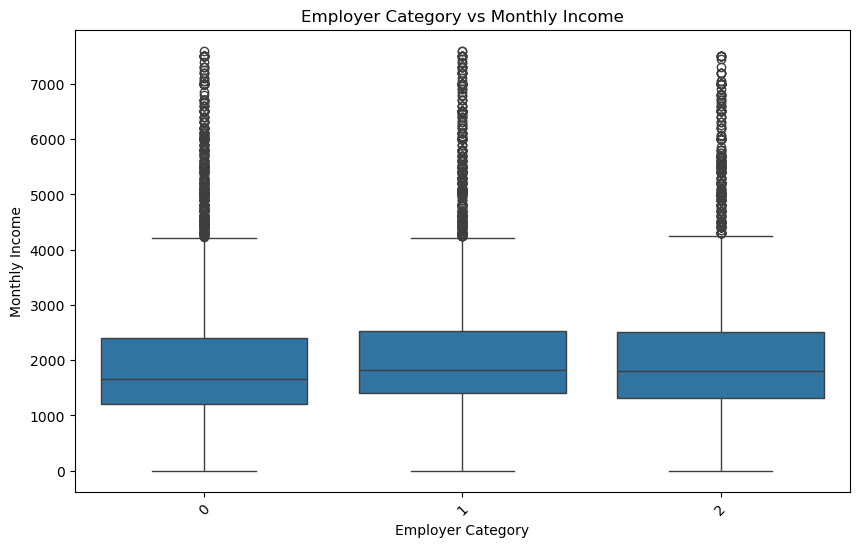

In [44]:
plt.figure(figsize=(10, 6))

# Create Boxplot
sns.boxplot(x=df['Employer_Category1'], y=df['Monthly_Income'])

# Show the plot
plt.title('Employer Category vs Monthly Income')
plt.xlabel('Employer Category')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

#### 14. Multi-Histogram Visualization

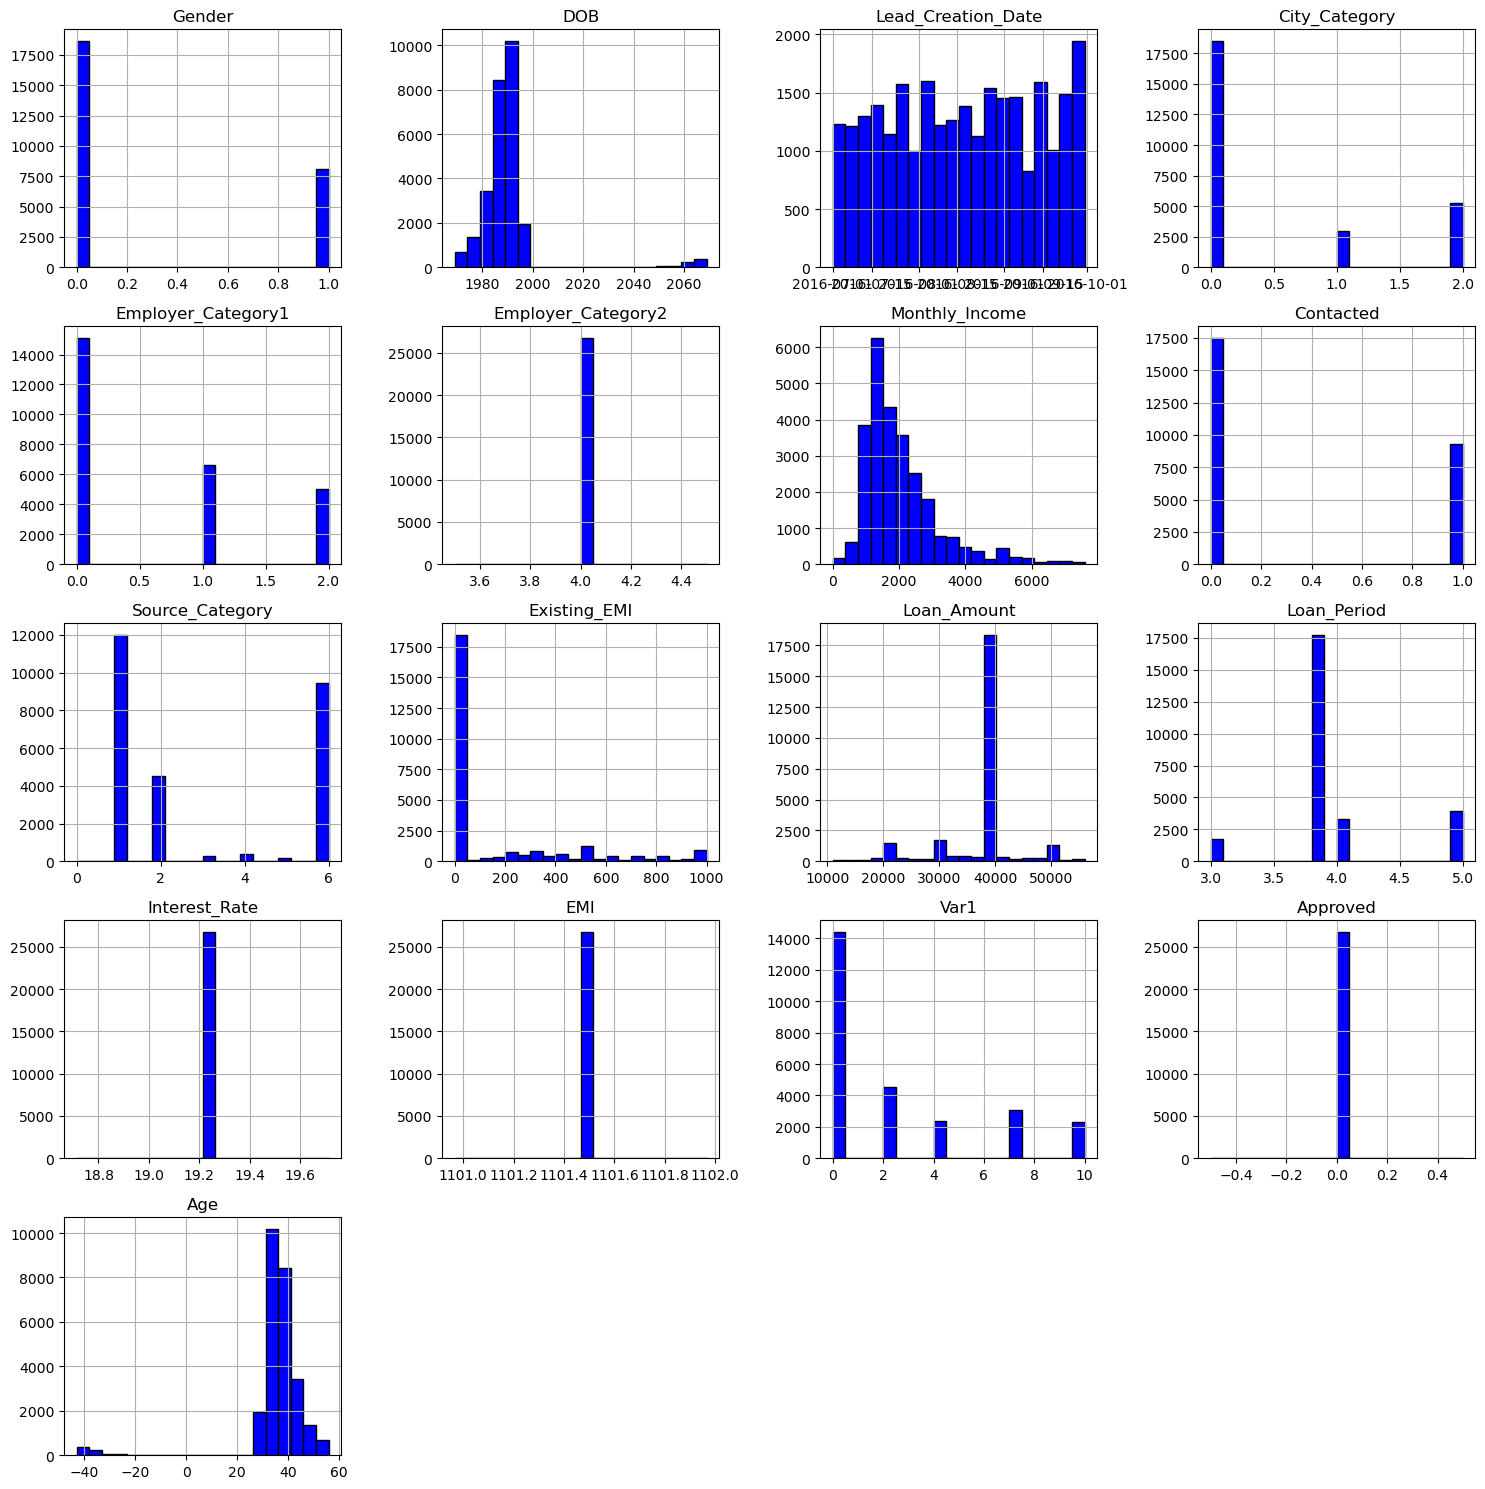

In [46]:
# Create a grid of histograms for all numerical columns
df.hist(figsize=(15, 15), bins=20, color='blue', edgecolor='black')

# Show the plot
plt.tight_layout()
plt.show()